ADCC 2022 - Data Analysis 
---

The 2022 Abu Dhabi Combat Club (ADCC) Submission Fighting World Championship was an international submission grappling tournament held at the Thomas & Mack Center in Las Vegas, Nevada, USA, in September of 2022.
This championship is widely considered to be the most prestigious submission grappling tournament in the world.

In this notebook you can find a quick analysis of the results of the tournament with an aim to give insight into the submission part of the tournament. 



Why analyze this?

I myself love grappling as a sport and as a hobby. But mainly I was interested in a couple of things:

How were the matches won?
What submissions were most common?
And at what times were they most likely to occur?

This work has given me important insight into the current grappling 'meta' and showed me on what to focus in my own training. More in the conclusion...

Tableau Dashboard : https://public.tableau.com/views/proj1_17073084540380/Dashboard32?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link


Importing libraries and data cleaning
--

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 

In [2]:
#reading the .csv file and cleaning the NaN data
adcc = pd.read_csv('/kaggle/input/adcc-2022-matches-dataset/ADCC_2022 - Pgina1.csv')

adcc['submission'] = adcc['submission'].fillna('No sub')
adcc['score_x'] = adcc['score_x'].fillna('No data')
adcc['score_y'] = adcc['score_y'].fillna('No data')
adcc['total_score_sum'] = adcc['total_score_sum'].fillna('No data')
adcc['match_duration'] = adcc['match_duration'].fillna('0:00')
adcc['went_overtime'] = adcc['went_overtime'].fillna('No data')

In [3]:
#Checking if every NaN value has been removed
adcc.isnull().sum().sum()

0

In [4]:
#There are some faulty data inputs regarding the 'match_duration' column (np.unique(adcc.match_duration))
#in some instances there are '.' instead of ':'. This function corrects that

def correct_time_format(x):
    if '.' in x:
        corrected_t = x.replace('.', ':')
        return corrected_t
    else:
        return x

# Apply the function to the 'Time' column
adcc['match_duration'] = adcc['match_duration'].apply(correct_time_format)

# Display the corrected DataFrame
np.unique(adcc.match_duration)

array(['0:00', '0:11', '0:18', '10:0', '10:00', '11:00', '11:49', '11:51',
       '13:44', '14:10', '15:00', '1:15', '1:53', '1:59', '20:00', '2:15',
       '2:18', '2:43', '2:57', '3:00', '3:19', '3:32', '4:08', '4:35',
       '4:57', '5:04', '5:39', '5:49', '5:57', '6:00', '6:18', '6:25',
       '6:33', '6:37', '7:10', '7:51', '7:54', '7:58', '8:16', '8:24',
       '8:30', '8:34', '8:48', '9:10', '9:35', '9:49'], dtype=object)

In [5]:
#How were the matches won?
np.unique(adcc.type_win)

array(['FOR', 'INJURY', 'REF', 'SCORE', 'SUB'], dtype=object)

In [6]:
#I didn't like the format of the 'type_win' column so the new categories of submissions are determined as such:

# Define the values and how they will be replaced with a dictionary
type_win_categorization = {'FOR': 'Forfeit', 
                       'INJURY': 'Injury', 
                       'REF': 'Referee', 
                       'SCORE':'Score',
                       'SUB':'Submission'}

# Replace values in the 'Category' column
adcc['type_win'] = adcc['type_win'].replace(type_win_categorization)
np.unique(adcc.type_win)

array(['Forfeit', 'Injury', 'Referee', 'Score', 'Submission'],
      dtype=object)

In [7]:
#Converting the HH:SS format into seconds
def m_into_s(x):
    m,s = map(int, x.split(':'))
    return (m*60)+s

adcc['duration_in_s'] = adcc['match_duration'].apply(m_into_s)
adcc['duration_in_min'] = (adcc['duration_in_s']/60)
adcc.head()


,match_id,bracket,sex,round,fighter_x,fighter_y,match_duration,winner,type_win,submission,score_x,score_y,total_score_sum,went_overtime,duration_in_s,duration_in_min
0,1,- 66KG,M,round of 16,G.Tonon,S.McNally,10:00,S.McNally,Score,No sub,0.0,3.0,3.0,False,600,10.000000
1,2,- 66KG,M,round of 16,J.Cisneros,E.Crelinsten,13:44,J.Cisneros,Submission,Armbar,0.0,4.0,4.0,True,824,13.733333
2,3,- 66KG,M,round of 16,C.Abate,F.Andrey,15:00,F.Andrey,Referee,No sub,0.0,0.0,0.0,True,900,15.000000
3,4,- 66KG,M,round of 16,D.Reis,A.Willians,10:00,D.Reis,Score,No sub,2.0,0.0,2.0,False,600,10.000000
4,5,- 66KG,M,round of 16,K.Maciel,G.Martinez,8:30,K.Maciel,Submission,RNC,3.0,0.0,3.0,False,510,8.500000


Data filtering, classification, additional cleaning and visualizations
--

In [8]:
#How were the matches won at the ADCC2022
type_win_1d = adcc['type_win'].value_counts()
type_win_1d

type_win
Score         48
Submission    39
Referee       20
Forfeit        3
Injury         2
Name: count, dtype: int64

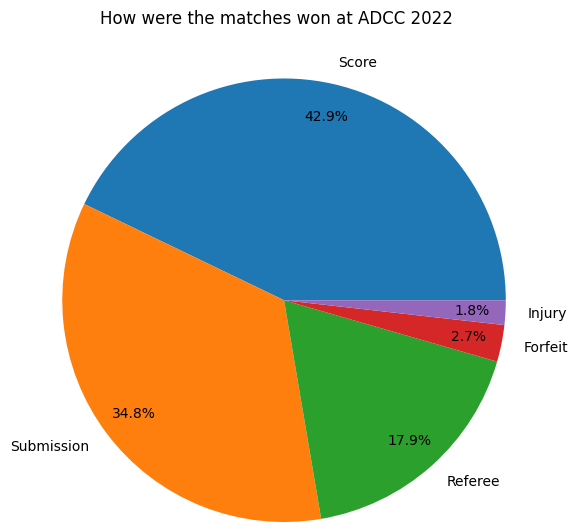

In [9]:
#Pie chart: How matches were won at the ADCC 2022
labels = 'Score', 'Submission', 'Referee', 'Forfeit', 'Injury'
fig, ax = plt.subplots()

fig.suptitle('How were the matches won at ADCC 2022', y = 1.1)

ax.pie(type_win_1d, labels=labels, 
       autopct='%1.1f%%', radius = 1.5, wedgeprops = {'linewidth': 0}, pctdistance=0.85, labeldistance=1.1); # ';' disables the unnecessary text before the visualization :) 



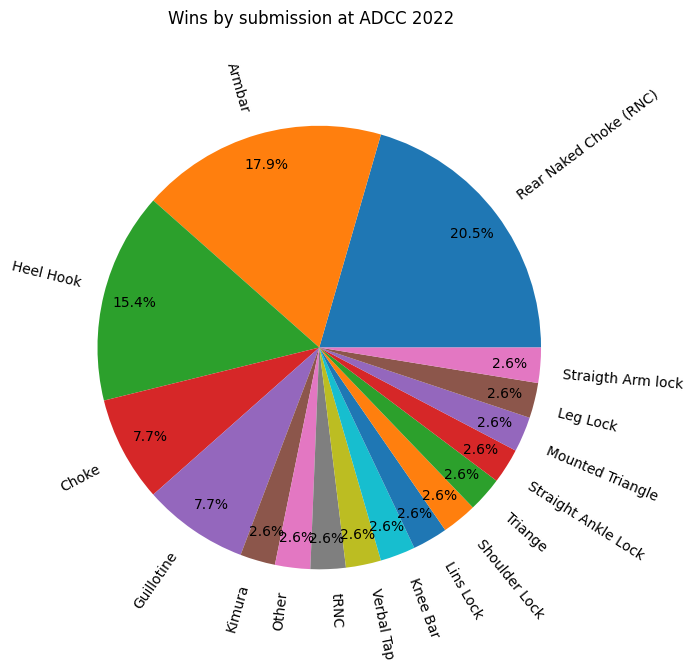

In [10]:
#Pie chart: What were the most common submissions?
sub_count = pd.DataFrame(adcc['submission'].value_counts())
sub_count.drop(labels='No sub', inplace=True)

#Pie plot of the most common submissions
labels = 'Rear Naked Choke (RNC)', 'Armbar', 'Heel Hook', 'Choke', 'Guillotine', 'Kimura', 'Other', 'tRNC', 'Verbal Tap','Knee Bar', 'Lins Lock', 'Shoulder Lock', 'Triange', 'Straight Ankle Lock', 'Mounted Triangle', 'Leg Lock', 'Straigth Arm lock'
fig, ax = plt.subplots()
fig.suptitle('Wins by submission at ADCC 2022', y=1.2)
ax.pie(sub_count['count'], labels=labels, 
       autopct='%1.1f%%', radius = 1.5, wedgeprops = {'linewidth': 0}, rotatelabels = 270, pctdistance=0.86, labeldistance=1.1);


In [11]:
#To analyze the submissions more broadly as in terms of type of submission, we need to categorise them into groups.
#But first we need to find out all of the different submissions
pd.unique(adcc.submission)

array(['No sub', 'Armbar', 'RNC', 'Heel Hook', 'Leg Lock',
       'Mounted Triangle', 'Straight Ankle Lock', 'Guillotine',
       'Triangle', 'Lins Lock', 'Shoulder Lock', 'Kimura', 'Kneebar',
       'Verbal Tap', 'Choke', '\tRNC', 'Other', 'Armlock'], dtype=object)

In [12]:
#The the '/t RNC' could cause issues in further coding so it is changed
for i in range(len(adcc)):
    if adcc['submission'][i] == '\tRNC':
        adcc.at[i, 'submission'] = 'tRNC'       
pd.unique(adcc.submission)

array(['No sub', 'Armbar', 'RNC', 'Heel Hook', 'Leg Lock',
       'Mounted Triangle', 'Straight Ankle Lock', 'Guillotine',
       'Triangle', 'Lins Lock', 'Shoulder Lock', 'Kimura', 'Kneebar',
       'Verbal Tap', 'Choke', 'tRNC', 'Other', 'Armlock'], dtype=object)

In [13]:
#TO make the analysis a bit simpler i grouped the submission in their categories. The new categories are determined in a dictionary as such:
submission_categorization = {
                            'RNC':'Chokes', 'Guillotine':'Chokes','tRNC':'Chokes','Triangle':'Chokes', 'Shoulder Lock':'Chokes','Mounted Triangle':'Chokes','Choke':'Chokes',
                            'Armbar':'Arm Breaks','Kimura':'Arm Breaks', 'Armlock':'Arm Breaks',
                            'Heel Hook':'Leg Breaks', 'Kneebar':'Leg Breaks', 'Lins Lock':'Leg Breaks','Straight Ankle Lock':'Leg Breaks','Leg Lock':'Leg Breaks',
                            'Other':'Other', 'Verbal Tap':'Other',
                            'No sub' : 'No sub'}
#creates a new column with the new categories
adcc['submission_category'] = adcc['submission'].replace(submission_categorization)
pd.unique(adcc['submission_category'])

array(['No sub', 'Arm Breaks', 'Chokes', 'Leg Breaks', 'Other'],
      dtype=object)

In [14]:
#Filters for matches ended by submission
sub_only = (adcc.type_win == 'Submission')
adcc_sub_only = adcc[sub_only]

In [15]:
#group by submission cathegory
sub_cat_count = pd.DataFrame(adcc_sub_only.groupby('submission_category')['submission'].count())
sub_cat_count

,submission
submission_category,
Arm Breaks,9
Chokes,18
Leg Breaks,10
Other,2


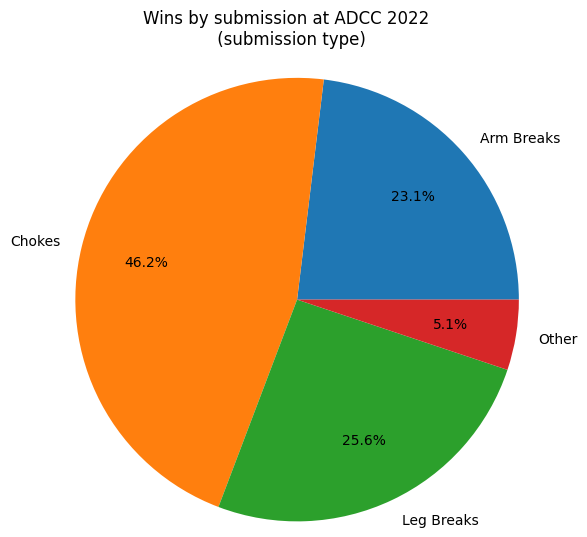

In [16]:
#Pie chart: Submission cathegories 
labels = 'Arm Breaks','Chokes', 'Leg Breaks', 'Other'
fig, ax = plt.subplots()

fig.suptitle('Wins by submission at ADCC 2022 \n (submission type)', y=1.1)

ax.pie(sub_cat_count['submission'], labels= labels, 
       autopct='%1.1f%%', radius = 1.5, wedgeprops = {'linewidth': 0}, pctdistance=0.7, labeldistance=1.1 );

ISSUE with the data - Male lightweights


In [17]:
#How many matches were held for each gender?
gender_matches = adcc['sex'].value_counts()
print(gender_matches)

sex
M    96
F    16
Name: count, dtype: int64


In [18]:
# Number of competitors? 
x = pd.unique(adcc['fighter_x'])
y = pd.unique(adcc['fighter_y'])
x_y = np.append(x,y)
x_y = pd.unique(x_y)
print('Number of competitors:', len(x_y))
#this is important because some competitors can compete in their weight class AND the Absolute category

Number of competitors: 96


In [19]:
#While plotting the data there was an issue with the lightest male category 
male_only = (adcc.sex == 'M')
female_only = (adcc.sex == 'F')
adccM = adcc[male_only]
adccF = adcc[female_only]

### After all of the data cleaning the category of - 66 kg wasnt grouping as expected. Some faulty data input?
adccM.groupby('bracket')['submission'].count()

bracket
+ 99KG       16
- 66KG        1
- 66KG        6
- 66KG        9
- 77KG       16
- 88 KG      16
- 99 KG      16
ABSOLUTE     16
Name: submission, dtype: int64

In [20]:
## As shown here the input '- 66KG' returns only one match
lightweight_filter = adccM.bracket == '- 66KG'
lightweight_only = adccM[lightweight_filter]
lightweight_only


,match_id,bracket,sex,round,fighter_x,fighter_y,match_duration,winner,type_win,submission,score_x,score_y,total_score_sum,went_overtime,duration_in_s,duration_in_min,submission_category
0,1,- 66KG,M,round of 16,G.Tonon,S.McNally,10:00,S.McNally,Score,No sub,0.0,3.0,3.0,False,600,10.0,No sub


In [21]:
#using this type of filtering it was shown that the data is the same in regards to the body of the text. 
filtered_df = adccM[adccM['bracket'].str.contains('- 66KG', case=False)]
filtered_df.head(16)

##BUT! some probing showed that there are 1 and 2 extra spaces after e.g. '- 66KG_' and '- 66KG_ _ '

,match_id,bracket,sex,round,fighter_x,fighter_y,match_duration,winner,type_win,submission,score_x,score_y,total_score_sum,went_overtime,duration_in_s,duration_in_min,submission_category
0,1,- 66KG,M,round of 16,G.Tonon,S.McNally,10:00,S.McNally,Score,No sub,0.0,3.0,3.0,False,600,10.000000,No sub
1,2,- 66KG,M,round of 16,J.Cisneros,E.Crelinsten,13:44,J.Cisneros,Submission,Armbar,0.0,4.0,4.0,True,824,13.733333,Arm Breaks
2,3,- 66KG,M,round of 16,C.Abate,F.Andrey,15:00,F.Andrey,Referee,No sub,0.0,0.0,0.0,True,900,15.000000,No sub
3,4,- 66KG,M,round of 16,D.Reis,A.Willians,10:00,D.Reis,Score,No sub,2.0,0.0,2.0,False,600,10.000000,No sub
4,5,- 66KG,M,round of 16,K.Maciel,G.Martinez,8:30,K.Maciel,Submission,RNC,3.0,0.0,3.0,False,510,8.500000,Chokes
5,6,- 66KG,M,round of 16,K.Krikorian,D.Pato Oliveira,3:00,D.Pato Oliveira,Submission,Heel Hook,0.0,0.0,0.0,False,180,3.000000,Leg Breaks
6,7,- 66KG,M,round of 16,A.Agazarm,J.Skinner,15:00,J.Skinner,Referee,No sub,0.0,0.0,0.0,True,900,15.000000,No sub
7,8,- 66KG,M,round of 16,G.Sousa,R.Alvarenga,10:00,G.Sousa,Score,No sub,5.0,0.0,5.0,False,600,10.000000,No sub
8,9,- 66KG,M,quarter,S.McNally,J.Cisneros,15:00,J.Cisneros,Referee,No sub,0.0,0.0,0.0,True,900,15.000000,No sub
9,10,- 66KG,M,quarter,F.Andrey,D.Reis,15:00,D.Reis,Referee,No sub,0.0,0.0,0.0,True,900,15.000000,No sub


In [22]:
# Removing the extra space after the weight category in the 'bracket', and re-applying the filters that will be needed later
adcc['bracket'] = adcc['bracket'].str.strip()
adccM = adcc[male_only]
adccF = adcc[female_only]
adcc_sub_only = adcc[sub_only]
adcc_sub_onlyM = adcc[sub_only & male_only]


In [23]:
# Number of male competitors
xM = pd.unique(adccM['fighter_x'])
yM = pd.unique(adccM['fighter_y'])
x_yM = np.append(xM,yM)
x_yM = pd.unique(x_yM)
print('Number of male competitors: ', len(x_yM))

Number of male competitors:  80


In [24]:
# Number of female competitors
xF = pd.unique(adccF['fighter_x'])
yF = pd.unique(adccF['fighter_y'])
x_yF = np.append(xF,yF)
x_yF = pd.unique(x_yF)
print('Number of female competitors: ',len(x_yF))

Number of female competitors:  16


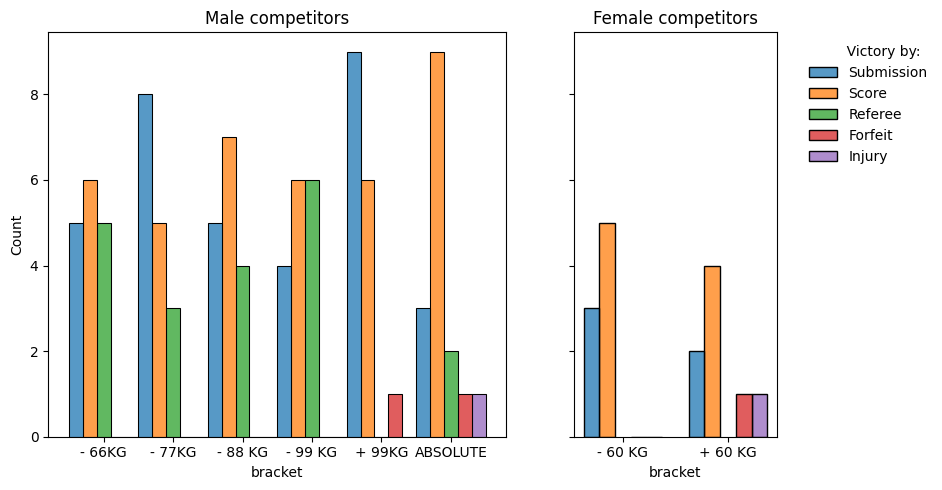

In [25]:
#Plotting the type of win 
warnings.filterwarnings("ignore", category=FutureWarning)  # this is to remove a future warning for something that will be deprecated in the next version of seaborn but for now it doesn't have a influence on the visualization

f, axes = plt.subplots(1, 2, figsize = (10,5), sharey=True, sharex = False, layout = 'tight')
axes[0].set_title('Male competitors')
axes[1].set_title('Female competitors')
axes[1].tick_params(axis = 'y')
axes[1].set_box_aspect(2/1)


M = sns.histplot(adccM, x='bracket', ax = axes [0],
             hue='type_win', hue_order = ['Submission', 'Score', 'Referee', 'Forfeit', 'Injury'], 
             stat='count', multiple='dodge', legend = False,)


F = sns.histplot(adccF, x='bracket', ax = axes [1],
             hue='type_win', hue_order = ['Submission', 'Score', 'Referee', 'Forfeit', 'Injury'], 
             stat='count', multiple='dodge', shrink= 0.75)


sns.move_legend(F, "upper left", bbox_to_anchor=(1.1, 1), 
                title = '       Victory by:', 
                frameon = False)

sns.set_style("whitegrid", {'grid.linestyle': ''})

plt.show()


##### plt.legend(labels = ['Submission', 'Score', 'Referee', 'Forfeit', 'Injury']) doesn't work properly!



In [26]:
number_of_matches = pd.DataFrame(adcc.groupby(['bracket','sex'])['match_id'].count())
number_of_matches.columns = ['n_matches']
number_of_matches.sort_values(by= ['sex','bracket'], ascending=True)

,,n_matches
bracket,sex,
+ 60 KG,F,8
- 60 KG,F,8
+ 99KG,M,16
- 66KG,M,16
- 77KG,M,16
- 88 KG,M,16
- 99 KG,M,16
ABSOLUTE,M,16


For further analysis I will only take into account the male competitor categories because of the number of competitors and more categories


In [27]:
#To prepare a heat map of the most common submission at each weight class we first we need to group the data and get the count of the values.
#Then we need to unstack the data into a pd.DataFrame and fill out the NaN data with 0. 
#After that we changed the order of indices so the y-axis hase more sense

hm = (adcc_sub_onlyM.groupby('bracket')['submission'].value_counts().unstack().fillna(0))
 
hm = hm.reindex(['- 66KG', '- 77KG', '- 88 KG', '- 99 KG', '+ 99KG', 'ABSOLUTE' ])

hm = hm[['Armbar', 'Kimura', 'Mounted Triangle', 'Triangle', 'Choke', 'Guillotine', 'RNC', 'Shoulder Lock','Heel Hook', 'Kneebar', 'Leg Lock',  'Lins Lock', 'Straight Ankle Lock', 'Verbal Tap']]
 
hm




submission,Armbar,Kimura,Mounted Triangle,Triangle,Choke,Guillotine,RNC,Shoulder Lock,Heel Hook,Kneebar,Leg Lock,Lins Lock,Straight Ankle Lock,Verbal Tap
bracket,,,,,,,,,,,,,,
- 66KG,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
- 77KG,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
- 88 KG,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
- 99 KG,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
+ 99KG,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
ABSOLUTE,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


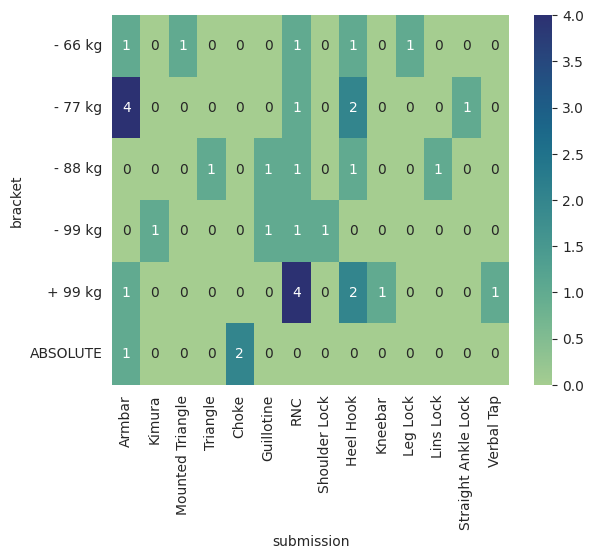

In [28]:
#Heat map 
sns.heatmap(hm, annot = True, cmap="crest",
            yticklabels = ['- 66 kg', '- 77 kg', '- 88 kg', '- 99 kg', '+ 99 kg', 'ABSOLUTE']);



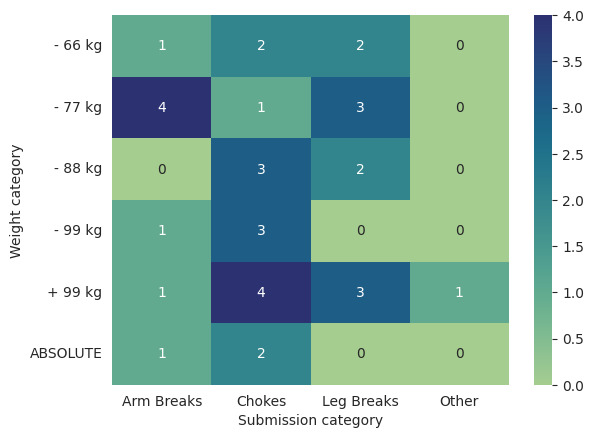

In [29]:
#Heat map 
hm2 = (adcc_sub_onlyM.groupby('bracket')['submission_category'].value_counts().unstack().fillna(0)
.reindex(['- 66KG', '- 77KG', '- 88 KG', '- 99 KG', '+ 99KG', 'ABSOLUTE' ]))

sns.heatmap(hm2, annot = True,cmap="crest", 
            yticklabels = ['- 66 kg', '- 77 kg', '- 88 kg', '- 99 kg', '+ 99 kg', 'ABSOLUTE']
           )
plt.ylabel('Weight category')
plt.xlabel('Submission category');


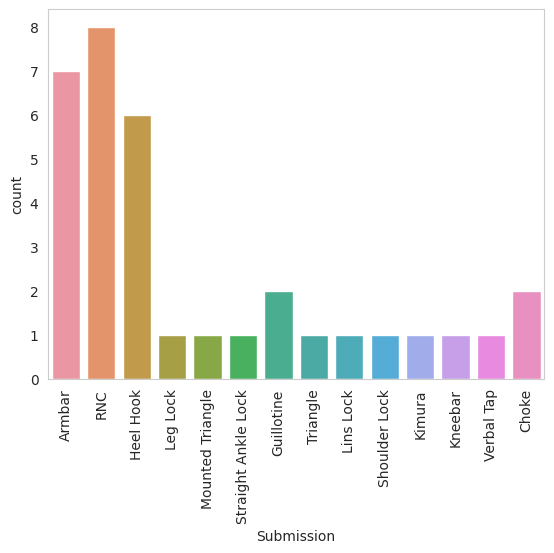

In [30]:
# Number of each succesful submission 
count_plot = sns.countplot(data = adcc_sub_onlyM, x = 'submission') 
plt.xticks(rotation=90)
plt.xlabel('Submission');


{The match duration for the ADCC world championships is 10 min (+ 5 min with overtime). 
In the case of the finals it increases to 20 min (+ 10 min with overtime with an extra + 10 min if it still isn't resolved).}

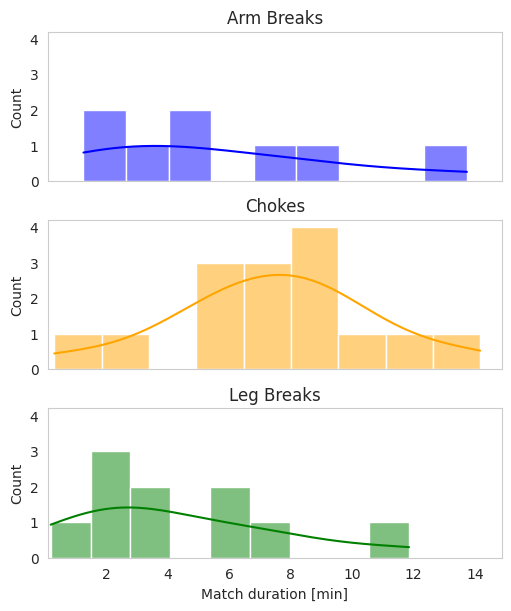

In [31]:
#The distribution of different submission categories across the duration of the match
sub_per_t = adcc_sub_onlyM.groupby('submission_category')['duration_in_min'].value_counts()

f, axes = plt.subplots(3,1, figsize = (5,6), sharex = True,  sharey = True, layout ='constrained')
d1 = sns.histplot(sub_per_t['Arm Breaks'], x='duration_in_min', kde=True, bins=9, ax = axes[0], color ='blue')
d2 = sns.histplot(sub_per_t['Chokes'], x='duration_in_min', kde=True, bins=9, ax = axes[1],  color ='orange')
d3 = sns.histplot(sub_per_t['Leg Breaks'], x='duration_in_min', kde=True, bins=9, ax = axes[2],  color ='green')
plt.xlim(0.1)
plt.xlabel('Match duration [min]')
axes[0].set_title('Arm Breaks')
axes[1].set_title('Chokes')
axes[2].set_title('Leg Breaks');




Leg Break and Arm Break submissions were more common at the beginig of the match.
On the other hand Chokes are distributed more evenly, and the highest likelyhood of them occuring is around the 8th minute.  
What is common in all cases is that the likelyhood of a submission decreases as the match comes to its designated end.

The main reason why there is a decrease in submissions as the match time runs out is the fact that fighters with a point advantage at the end of the match stall (i.e. become passive) to ensure their victory by points, which decreases the chances of a successful submission attempt for both participants. Also, there is the possibility of fatigue that slows down the fighters and limits position control and submission efficiency as the match continues.

In [32]:
#What is the number of matches that went into overtime in the male competitor categories
number_of_matches_overtime = pd.DataFrame(adccM.groupby(['went_overtime'])['match_id'].count())
number_of_matches_overtime
ot = adccM['went_overtime'] == True #n(matches overtime)
reg = adccM['went_overtime'] == False #regular time 
nd = adccM['went_overtime'] == 'No data' # there is one No data input that is actually a Score win
matches = len(adccM[reg]) + len(adccM[ot]) + len(adccM[nd])
print('Male competitors')
print('Number of matches: ', matches)
print('Number of matches that went into overtime: ', len(adccM[ot]), '(',(round((100*(len(adccM[ot]))/matches),2)), '%', ')',) 

#Number of the overtime matches that finished with a submission
overtime_subs = adccM[ot].groupby('type_win')['match_id'].count()
print('Number of matches that finished with a submission during overtime:', overtime_subs['Submission'], '(',(100*overtime_subs['Submission']/len(adccM[ot])), '%',')')


Male competitors
Number of matches:  96
Number of matches that went into overtime:  25 ( 26.04 % )
Number of matches that finished with a submission during overtime: 2 ( 8.0 % )


If the matches go into overtime the referee usually declares the more dominant competitor the winner. 26 % of the matches go to overtime, but only a fraction (8 %) of that end in overtime by submission. Because of this, overtime submissions do not influence as much, the distribution of the submission categories because they aren't as prevalent.



In [33]:
#And now. Just out of curiosity. How were the final matches won? 
finals = adccM['round'] == 'final'
adccM[finals]


,match_id,bracket,sex,round,fighter_x,fighter_y,match_duration,winner,type_win,submission,score_x,score_y,total_score_sum,went_overtime,duration_in_s,duration_in_min,submission_category
14,15,- 66KG,M,final,D.Reis,G.Sousa,20:00,D.Reis,Score,No sub,3.0,0.0,3.0,False,1200,20.000000,No sub
30,31,- 77KG,M,final,K.Ruotolo,M.Galvao,11:51,K.Ruotolo,Submission,Heel Hook,0.0,0.0,0.0,False,711,11.850000,Leg Breaks
46,47,- 88 KG,M,final,G.Bodoni,L.Hulk,14:10,G.Bodoni,Submission,RNC,9.0,0.0,9.0,False,850,14.166667,Chokes
62,63,- 99 KG,M,final,K.Duarte,C.Jones,20:00,K.Duarte,Score,No sub,12.0,0.0,12.0,False,1200,20.000000,No sub
78,79,+ 99KG,M,final,G.Ryan,N.Rodriguez,2:15,G.Ryan,Submission,Heel Hook,0.0,0.0,0.0,False,135,2.250000,Leg Breaks
110,111,ABSOLUTE,M,final,Y.Simoes,N.Meregali,20:00,Y.Simoes,Score,No sub,0.0,0.0,0.0,False,1200,20.000000,No sub


Conclusions
---


I probably need to buy an instructional video on Heel Hooks ...

But in all seriousness, this data analysis gave insight into a very important fact. The fundamentals like Arm Bars and Rear Naked Chokes are a huge part of the submissions repertoire. These are the fundamental techniques that you even learn on your first day of grappling/jiu jitsu/sambo training. And know you know why: they work even at the highest level.

Of course as the results have shown, Heel hooks as the more "advanced" techniques are also prevalent. Heel hooks could be deployed from awkward and assumingly "bad" non-dominant positions. This coupled with their speed, control and unpredictablity is the reason why they are becoming more and more popular in the past 10 years.

I, myself, as a 77-ish kg grappling-hobbyist-individual very much apreciate the heat maps. They show data regarding the weight classes and submissions. These alone can be very important to see where you stand with your technique and what are your chances in a (lets be fair...) local no-name tournament. 
This all brings up the questions:
-Do you know how to defend the most comon submission from your category from all of the different positions (whilst scrambling, standing, mount/mounted, closed guard, 4/11 etc.)? 
-Do you know how to attack with those submissions? 
-How to transition from one submission to the next best one?

Go train, have fun, good luck...

